# DATA EXPLORATION
- Goal: Address each of the questions you posed in your planning and brainstorming and any others you have come up with along the way through **visual or statistical analysis**.

- When you have completed this step, you will have the findings from your analysis that will be used in your final report, answers to specific questions your customers has asked, and information to move forward toward building a model.

- Run at least **1 t-test** and **1 correlation test** (but as many as you need!)

- **Visualize** all combinations of variables in some way(s).

- What **independent variables** are **correlated** with the **dependent**? (this is good)

- Which **independent variables** are **correlated** with other **independent** variables? (this is not so good and needs to be addressed)

- **Summarize** your takeaways and conclusions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from split_scale import split_data


In [2]:
train, test = split_data()
train.head()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,zip,home_value,bedrm_per_bathrm
6056,1246.0,4.0,2.0,0.013398,1954.0,96490.0,291124.0,2.000000
8137,1330.0,3.0,2.0,0.012266,1967.0,97007.0,241434.0,1.500000
1720,1492.0,3.0,2.0,0.012608,1968.0,96107.0,468397.0,1.500000
11152,1122.0,3.0,2.0,0.011105,1952.0,96437.0,451439.0,1.500000
7141,1336.0,4.0,1.5,0.011868,1971.0,96203.0,340637.0,2.666667


In [3]:
train.describe()

,home_size,bedroomcnt,bathroomcnt,tax_rate,yearbuilt,zip,home_value,bedrm_per_bathrm
count,9892.000000,9892.000000,9892.000000,9892.000000,9892.000000,9892.000000,9892.000000,9892.000000
mean,1582.939446,3.101901,1.959209,0.013134,1955.286292,96487.283562,320002.444602,1.717812
std,534.466725,0.802085,0.672690,0.001663,20.074029,4328.195589,190168.800225,0.577417
min,320.000000,0.000000,1.000000,0.010686,1880.000000,95982.000000,12788.000000,0.000000
25%,1200.000000,3.000000,1.500000,0.012107,1947.000000,96163.000000,175099.000000,1.333333
50%,1493.000000,3.000000,2.000000,0.012591,1954.000000,96326.000000,286182.500000,1.500000
75%,1889.000000,4.000000,2.000000,0.013743,1965.000000,96506.000000,436798.500000,2.000000
max,3538.000000,5.000000,3.000000,0.018987,2015.000000,399675.000000,876160.000000,5.000000


In [4]:
train.zip.value_counts()

96193.0    147
97319.0    110
96368.0    108
96361.0    103
96242.0    102
          ... 
96979.0      1
96954.0      1
96947.0      1
96207.0      1
96985.0      1
Name: zip, Length: 359, dtype: int64

In [23]:
train.tax_rate.

0.012248    1
0.012723    1
0.013775    1
0.013248    1
0.012510    1
           ..
0.012224    1
0.012049    1
0.011557    1
0.012111    1
0.012531    1
Name: tax_rate, Length: 9892, dtype: int64

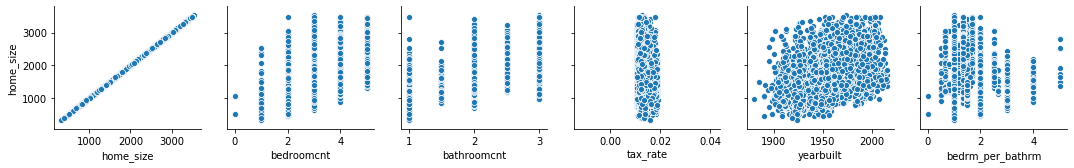

In [6]:
X = ['home_size', 'bedroomcnt', 'bathroomcnt', 'tax_rate', 'yearbuilt', 'bedrm_per_bathrm']
sns.pairplot(train, x_vars = X , y_vars='home_size')

In [7]:
train.tax_rate.value_counts

<bound method IndexOpsMixin.value_counts of 6056     0.013398
8137     0.012266
1720     0.012608
11152    0.011105
7141     0.011868
           ...   
6387     0.013676
15954    0.012538
1570     0.016127
15207    0.016383
4493     0.012445
Name: tax_rate, Length: 9892, dtype: float64>

In [8]:
train.tax_rate.min()

0.010686343879510764

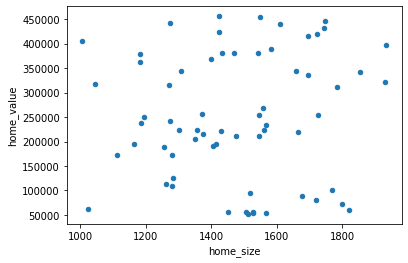

In [9]:

df = train[(train.bathroomcnt == 2)&(train.zip == 96193 )]
df.plot.scatter(x='home_size', y='home_value')
#plt.xlim(left = .01, right = .02)

In [10]:
train.corr()[['home_value']].abs().sort_values(by = 'home_value')

,home_value
zip,0.015069
bedroomcnt,0.161572
bedrm_per_bathrm,0.167319
yearbuilt,0.170062
bathroomcnt,0.275261
home_size,0.355328
tax_rate,0.536438
home_value,1.000000


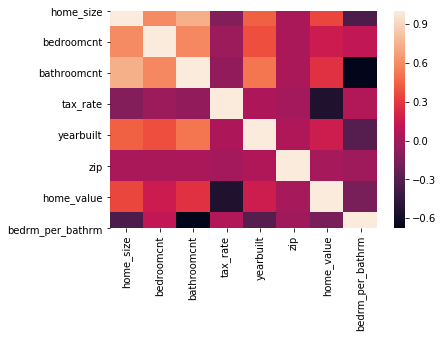

In [11]:
sns.heatmap(train.corr())

## t_test

#### Question: Are the home_values of the 3 bedrooms  higher than the ones with only 2 bedrooms
- $H_0$: There is no difference between those two 
- $H_0$: There is a differnce 

Hypothesis test: Two_sample_t_test  
$a$ = 0.05

In [12]:
from scipy import stats

In [13]:
x1 = train[train.bedroomcnt == 3].home_value
x2 = train[train.bedroomcnt == 2].home_value

In [14]:
t, p = stats.ttest_ind(x1, x2)
p 

3.6868217726751394e-09

Because p is less than a, we can conclude that there is a difference between home with 3 bedrooms and home with 2 bedrooms

## Correlation Test

1: Question:Does **tax rate** and **home_value** have a linear correlation  
- $H_0$: They don't   
- $H_0$: They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [15]:
x = train.tax_rate
y = train.home_value

In [16]:
corr, p = stats.pearsonr(x, y)
corr, p

(-0.5364380831077331, 0.0)

2: Question:Does **home_size** and **home_value** have a linear correlation
- $H_0$: They don't 
- $H_0$: They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [17]:
x = train.home_size
y = train.home_value

In [18]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.35532763659073924, 3.1192420924426693e-292)

3: Question:Does **bedrm_per_bathrm** and **home_value** have a linear correlation
- $H_0$ : They don't 
- $H_0$ : They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [19]:
x = train.bedrm_per_bathrm
y = train.home_value
corr, p = stats.pearsonr(x, y)
corr, p

(-0.16731926750047468, 4.993121397014596e-63)

4: Question:Does **yearbuilt** and **home_value** have a linear correlation
    
    - $H_0$: They don't 
    - $H_0$: They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [20]:
x = train.yearbuilt
y = train.home_value
corr, p = stats.pearsonr(x, y)
corr, p

(0.17006159786173963, 4.427831227277393e-65)

5.: Question:Does **home_size** and **bathroomcnt** have a linear correlation
- $H_0$: They don't 
- $H_0$: They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [21]:
x = train.bathroomcnt
y = train.home_size
corr, p = stats.pearsonr(x, y)
corr, p

(0.742273188325768, 0.0)

6.: Question:Does **bedroomcnt** and **bathroomcnt** have a linear correlation
- $H_0$: They don't 
- $H_0$: They do  
    
Hypothesis Test: Pearson's Correlation Coefficient

In [22]:
x = train.bathroomcnt
y = train.bedroomcnt
corr, p = stats.pearsonr(x, y)
corr, p

(0.5841806652969372, 0.0)

## Summary

- Home_size, bedroomcnt and bathroomcnt are all strongly correlated, So when doing the feature selection, It is preferred to use rfe method.
- It is a kind of domin knowlege that the higher the propert tax, ther better the neigbourhood, so the price of a home is higher. And the relation test show the have absolute linear relaitonship.
- Even though it is pretty common to think the age of a house is positvely related to the home price, but some how the data did not give us very strong correlations.